In [4]:
import numpy as np 

# find best mass spec gcn path 
min_loss = 1 
pos = (-1, -1, -1) # (gcn_lr, predictor_lr, epoch#)
for gcn_lr in [8e-05, 0.0001, 0.00015]: 
    for predictor_lr in [8e-05, 0.0001, 0.00015]: 
        path_prefix = './RL_attempt/mass_spec_lr_search/search_'+str(gcn_lr)+"_"+str(predictor_lr) 

        losses_file = open(path_prefix+"/models/mass_spec_training/losses.txt", 'r') 
        losses = losses_file.readlines() 
        losses_file.close() 

        losses = [float(l) for l in losses] 

        print(losses) # make sure no issues 

        midx = np.argmin(losses)
        if losses[midx] < min_loss: 
            pos = (gcn_lr, predictor_lr, (midx+1)*5) 
            min_loss = losses[midx] 
        
        print(losses[midx], min_loss) 

pos 

[0.1900313438809648, 0.19956063437370622, 0.18696340105059195, 0.18355060936597994, 0.181948056454029, 0.17777734905557366, 0.1748953330834225, 0.17339799418684324, 0.17134654136108501, 0.17018558621900726]
0.17018558621900726 0.17018558621900726
[0.1888802994080648, 0.18518010951692657, 0.18424332015482442, 0.17771344104952805, 0.17488745960635038, 0.1715635750727842, 0.16977102018189522, 0.16850812720343927, 0.1677832274830767, 0.16775944179912305]
0.16775944179912305 0.16775944179912305
[0.18598862361562038, 0.180263931539898, 0.17667673820420643, 0.17369967750368678, 0.17224965971533437, 0.17150783165814165, 0.17067221838182636, 0.16987455746501076, 0.16920858374986875, 0.1691883570961274]
0.1691883570961274 0.16775944179912305
[0.1852804525204155, 0.19313137916543957, 0.1923923909008427, 0.19720222950171756, 0.18985175361324633, 0.20140637879316903, 0.19157675506395042, 0.19119405022309144, 0.18682989155949684, 0.19125145215218012]
0.1852804525204155 0.16775944179912305
[0.1856565

(8e-05, 0.0001, 50)

In [5]:
'./RL_attempt/mass_spec_lr_search/search_'+str(pos[0])+'_'+str(pos[1])+'/models/mass_spec_training/FTreeGCN_training_epoch_'+str(pos[2])+'.pt' 

'./RL_attempt/mass_spec_lr_search/search_8e-05_0.0001/models/mass_spec_training/FTreeGCN_training_epoch_50.pt'

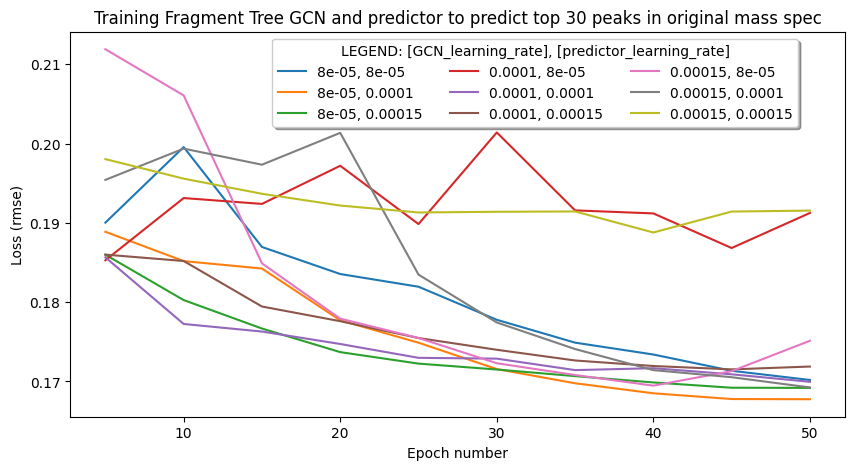

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

plt.figure() 

epoch_nums = [i*5 for i in range(1, 11)] 

for gcn_lr in [8e-05, 0.0001, 0.00015]: 
    for predictor_lr in [8e-05, 0.0001, 0.00015]: 
        path_prefix = './RL_attempt/mass_spec_lr_search/search_'+str(gcn_lr)+"_"+str(predictor_lr) 

        losses_file = open(path_prefix+"/models/mass_spec_training/losses.txt", 'r') 
        losses = losses_file.readlines() 
        losses_file.close() 

        losses = [float(l) for l in losses] 
        
        plt.plot(epoch_nums, losses, label=str(gcn_lr)+", "+str(predictor_lr))  

plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1),ncol=3, fancybox=True, shadow=True, title="LEGEND: [GCN_learning_rate], [predictor_learning_rate]") 
plt.xlabel("Epoch number") 
plt.ylabel("Loss (rmse)") 
plt.title("Training Fragment Tree GCN and predictor to predict top 30 peaks in original mass spec") 
plt.show() 


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

epoch_nums = [i*5 for i in range(1, 11)] 

from representations import * 

import dataloader 
test_smiless, test_ftrees, test_peakslist = dataloader.get_idxth_entry(0,'test') 

path_prefix = './RL_attempt/mass_spec_lr_search/search_8e-05_0.0001/models/mass_spec_training/FTreeGCN_training_epoch_50.pt'

for test_idx in range(len(test_smiless)) : 
    ms = MassSpec(False, test_ftrees[test_idx], path_prefix+"/models/mass_spec_training/FTreeGCN_epoch_50", None)

res = ms.toTensor() 
res

'''
losses = [float(l) for l in losses] 

plt.figure() 

plt.plot(epoch_nums, losses, label=str(gcn_lr)+", "+str(predictor_lr))  

plt.legend(loc='upper center', bbox_to_anchor=(0.6, 1),ncol=3, fancybox=True, shadow=True, title="LEGEND: [GCN_learning_rate], [predictor_learning_rate]") 
plt.xlabel("Epoch number") 
plt.ylabel("Loss (rmse)") 
plt.title("Training Fragment Tree GCN and predictor to predict top 30 peaks in original mass spec") 
plt.show() 
'''


: 